---

## Introduction

Spam emails are a common nuisance and pose threats like phishing, scams, and more. Machine Learning can help automate spam detection effectively. In this notebook, we will analyze the `spambase_v6.csv` dataset and build a machine learning model to classify emails as spam or not.

---


## 1. Exploratory Data Analysis (EDA)

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

`Load the dataset`

In [12]:
df = pd.read_csv("spambase_v6.csv")
df.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0,0,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


`Basic information`

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   object 
 3   word_freq_all               4595 non-null   float64
 4   word_freq_3d                4599 non-null   float64
 5   word_freq_our               4601 non-null   object 
 6   word_freq_over              4600 non-null   float64
 7   word_freq_remove            4601 non-null   object 
 8   word_freq_internet          4586 non-null   object 
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   float64
 13  word_freq_people            4601 

In [19]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [20]:
df['word_freq_000'].dtype

dtype('float64')

`Drop Unnamed Column`

In [17]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [18]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0,0,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,0.06,0,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,0.00,0,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,0.00,0,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


`Check missing values`

In [15]:
df.isnull().sum()

Unnamed: 0                      0
word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   0
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab 

In [21]:
df['word_freq_000'].unique()

array([0.  , 0.43, 1.16, 0.19, 0.35, 0.7 , 0.31, 0.05, 0.48, 0.3 , 0.84,
       0.49, 1.05, 1.83, 0.12, 1.96, 0.46, 1.88, 0.44, 0.62, 0.72, 1.28,
       0.59, 1.38, 0.6 , 0.64, 0.79, 1.13, 0.15, 0.5 , 0.61, 0.82, 0.38,
       2.53, 1.66, 0.34, 0.78, 1.02, 0.23, 0.53, 0.56, 1.62, 1.61, 0.39,
       1.6 , 0.37, 0.89, 0.96, 0.13, 0.22, 1.12, 0.95, 0.08, 0.06, 0.8 ,
       0.2 , 1.58, 0.54, 0.18, 0.85, 0.11, 1.  , 0.25, 0.36, 0.63, 0.65,
       0.45, 1.1 , 1.78, 0.14, 0.51, 1.03, 0.76, 1.07, 1.39, 1.44, 1.08,
       0.75, 0.4 , 2.05, 2.1 , 0.1 , 0.47, 3.38, 1.42, 1.85, 1.59, 0.68,
       1.41, 2.85, 2.95, 0.74, 0.28, 0.55, 1.82, 1.09, 1.18, 0.77, 2.2 ,
       2.24, 1.36, 0.09, 1.47, 0.17, 0.66, 1.23, 2.59, 0.41, 0.42, 0.29,
       0.86, 0.52, 0.91, 1.3 , 0.32, 1.06, 2.7 , 0.27, 0.24, 1.9 , 0.73,
       1.53, 1.14, 0.69, 2.35, 1.31, 0.9 , 0.16, 0.94, 1.57, 3.57, 0.03,
       0.81, 1.45, 5.45, 0.71, 1.01, 3.17, 0.99, 0.97, 1.11, 2.04, 0.58,
       1.19, 0.33, 1.92, 1.25, 4.76, 0.98, 0.87, 1.

In [22]:
df.fillna(0, inplace=True)

In [24]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

`Summary`

In [25]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


`Class Distribution & Visualize`

In [27]:
class_distribution = df["is_spam"].value_counts(normalize=True) * 100
class_distribution

is_spam
False    60.595523
True     39.404477
Name: proportion, dtype: float64

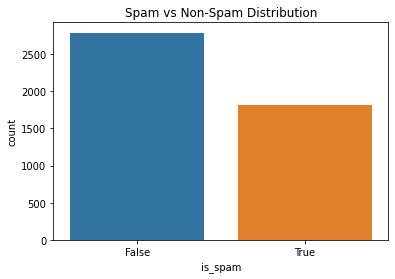

In [28]:
sns.countplot(data=df, x="is_spam")
plt.title("Spam vs Non-Spam Distribution")
plt.show()

`Correlations & Heat Map`

In [29]:
correlations = df.corr()["is_spam"].sort_values(ascending=False)

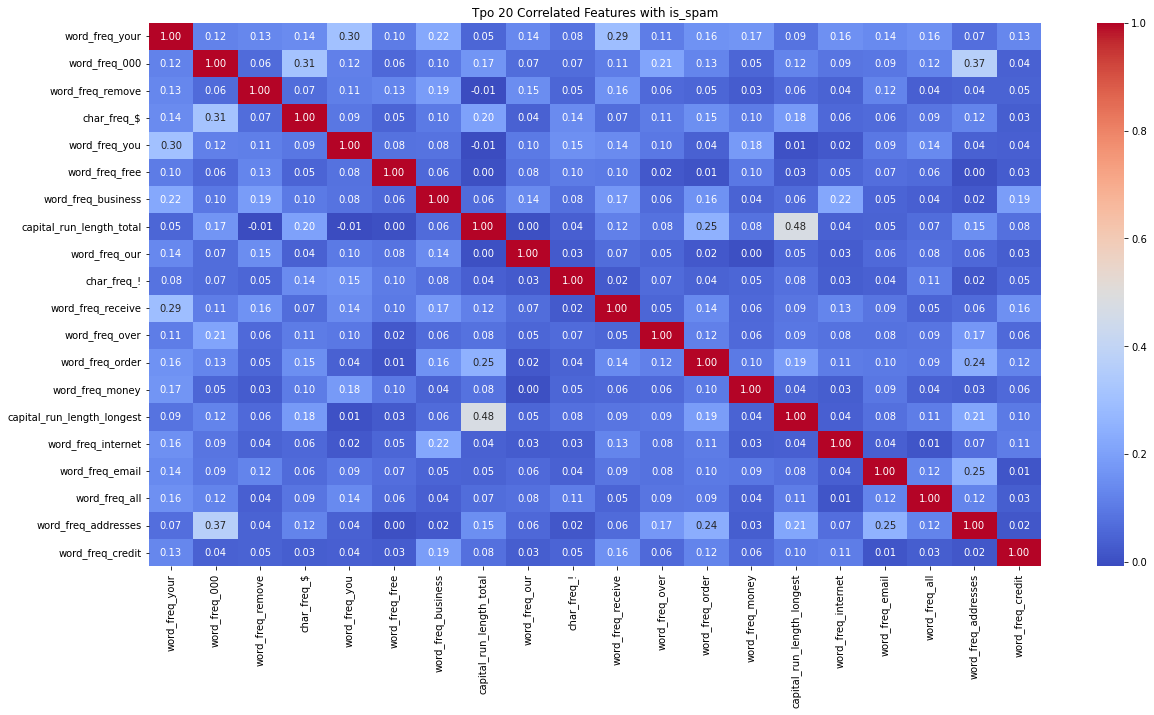

In [34]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[correlations[1:21].index].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Tpo 20 Correlated Features with is_spam")
plt.show()

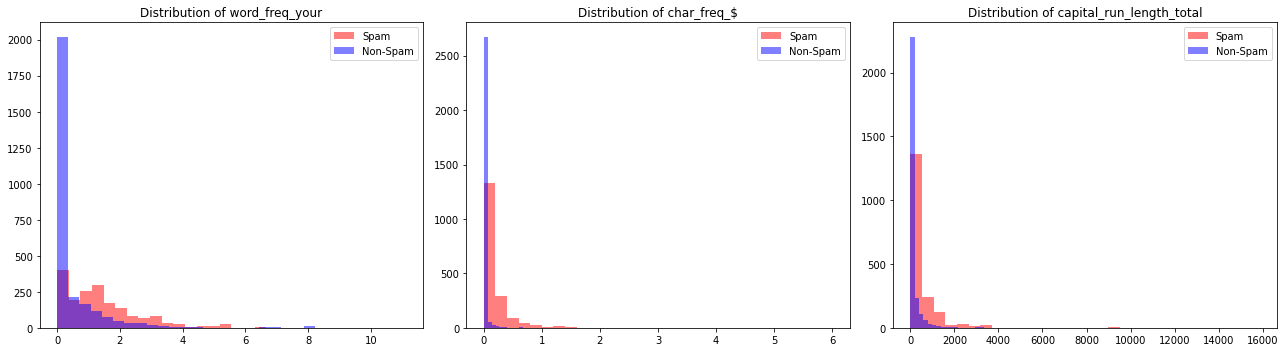

In [6]:

spam_df = df[df["is_spam"] == 1]
non_spam_df = df[df["is_spam"] == 0]
selected_features = ["word_freq_your", "char_freq_$", "capital_run_length_total"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(selected_features):
    axes[i].hist(spam_df[feature], bins=30, alpha=0.5, label='Spam', color='red')
    axes[i].hist(non_spam_df[feature], bins=30, alpha=0.5, label='Non-Spam', color='blue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend()
plt.tight_layout()
plt.show()



From the above distributions, we can observe that features like `word_freq_your`, `char_freq_$`, and `capital_run_length_total` show distinguishable patterns between spam and non-spam emails.


## 2. Data Preparation

In [7]:

df.duplicated().sum()


0

In [1]:

df = df.drop_duplicates()


NameError: name 'df' is not defined

In [9]:

X = df.drop("is_spam", axis=1)
y = df["is_spam"]


In [10]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


ValueError: could not convert string to float: 'zero'


We applied MinMax Scaling to normalize the features so they all fall within a similar range, which helps models like k-NN and logistic regression perform better.


## 3. Classification Algorithms

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


### Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


### Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", ax=axes[0])
axes[0].set_title("Logistic Regression")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", ax=axes[1])
axes[1].set_title("Random Forest")
plt.show()



Both models performed well, but Random Forest achieved better accuracy and recall. Hence, we will choose it for the final classification.


## 4. Final Classification

In [ ]:

train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.1%}")
print(f"Testing Accuracy: {test_acc:.1%}")



The training accuracy and testing accuracy show minimal overfitting, suggesting that Random Forest is a good generalizable model for this dataset.
